In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
from matplotlib.ticker import MaxNLocator
from scipy.special import binom
from scipy.optimize import curve_fit
from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
fparams =  {'xtick.labelsize': 22,
            'ytick.labelsize': 22,
            'axes.labelsize': 26,
            'axes.titlesize': 22,
            'font.size': 22,
            'legend.fontsize': 20,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path'}

In [3]:
%run "C:\Users\Nick\Projects\Yukawa_SYK\code\factor2AD\Tc_functions.py" 

In [4]:
%run "C:\Users\Nick\Projects\Yukawa_SYK\code\factor2AD\T_arrays.py" 

In [5]:
N_test = 300
a_test = 1e-2

In [6]:
T_test = 1.1e-3
g_test = 0.6

In [7]:
Det(N_test, T_test, g_test, a_test)

np.float64(0.08017669846063907)

In [8]:
def ebc_array(logt_max_plus):
    f = []
    for r in range(logt_max_plus):
        if r == 0:
            g = [0.05, 0.06, 0.07, 0.08, 0.09] 
        else:    
            g = [0.01 * i * 10 ** r for i in range(1, 10)]
        f = f + g
    f = f + [10 ** (logt_max_plus - 2)]    
    return np.round(f, 3) 

In [9]:
g_array = ebc_array(10)
print(g_array)
g_array.shape

[5.e-02 6.e-02 7.e-02 8.e-02 9.e-02 1.e-01 2.e-01 3.e-01 4.e-01 5.e-01
 6.e-01 7.e-01 8.e-01 9.e-01 1.e+00 2.e+00 3.e+00 4.e+00 5.e+00 6.e+00
 7.e+00 8.e+00 9.e+00 1.e+01 2.e+01 3.e+01 4.e+01 5.e+01 6.e+01 7.e+01
 8.e+01 9.e+01 1.e+02 2.e+02 3.e+02 4.e+02 5.e+02 6.e+02 7.e+02 8.e+02
 9.e+02 1.e+03 2.e+03 3.e+03 4.e+03 5.e+03 6.e+03 7.e+03 8.e+03 9.e+03
 1.e+04 2.e+04 3.e+04 4.e+04 5.e+04 6.e+04 7.e+04 8.e+04 9.e+04 1.e+05
 2.e+05 3.e+05 4.e+05 5.e+05 6.e+05 7.e+05 8.e+05 9.e+05 1.e+06 2.e+06
 3.e+06 4.e+06 5.e+06 6.e+06 7.e+06 8.e+06 9.e+06 1.e+07 2.e+07 3.e+07
 4.e+07 5.e+07 6.e+07 7.e+07 8.e+07 9.e+07 1.e+08]


(87,)

In [10]:
a_array = [10 ** i for i in range(-3,3)]
print(a_array)

[0.001, 0.01, 0.1, 1, 10, 100]


In [11]:
a_array_large = [10 ** i for i in range(0,3)]
print(a_array_large)

[1, 10, 100]


In [12]:
#a_array[3:]

In [13]:
T_c_dict = {}
for na in range(len(a_array)):
    T_c_list = []
    T_c_list.append(list(np.load('data/T_c/T_c_a={}.npy'.format(a_array[na]), allow_pickle = True)))
    T_c_dict[na] = T_c_list

In [14]:
color_list = ['b', 'r', 'c', 'silver', 'silver', 'silver']
mfc_list = ['b', 'r', 'c', 'silver', 'none', 'none']
marker_list = ['s', '*', '+', '.', 'd', 'x']

In [15]:
g_array[:-18]

array([5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01,
       4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00,
       3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00, 1.e+01,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       1.e+02, 2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02,
       9.e+02, 1.e+03, 2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03,
       8.e+03, 9.e+03, 1.e+04, 2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04,
       7.e+04, 8.e+04, 9.e+04, 1.e+05, 2.e+05, 3.e+05, 4.e+05, 5.e+05,
       6.e+05, 7.e+05, 8.e+05, 9.e+05, 1.e+06])

In [16]:
def fit(g, c):
    f = c * g ** 0.5
    return f

In [17]:
log_data = 1. / np.log(a_array[0] / (np.array(T_c_dict[0][0])[:6]))
g_data = g_array[:6]

popt, pcov = curve_fit(fit, g_data, log_data)
perr = np.sqrt(np.diag(pcov))

In [18]:
popt, perr

(array([0.74647489]), array([0.0064713]))

In [19]:
g_array[3:13]

array([0.08, 0.09, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 ])

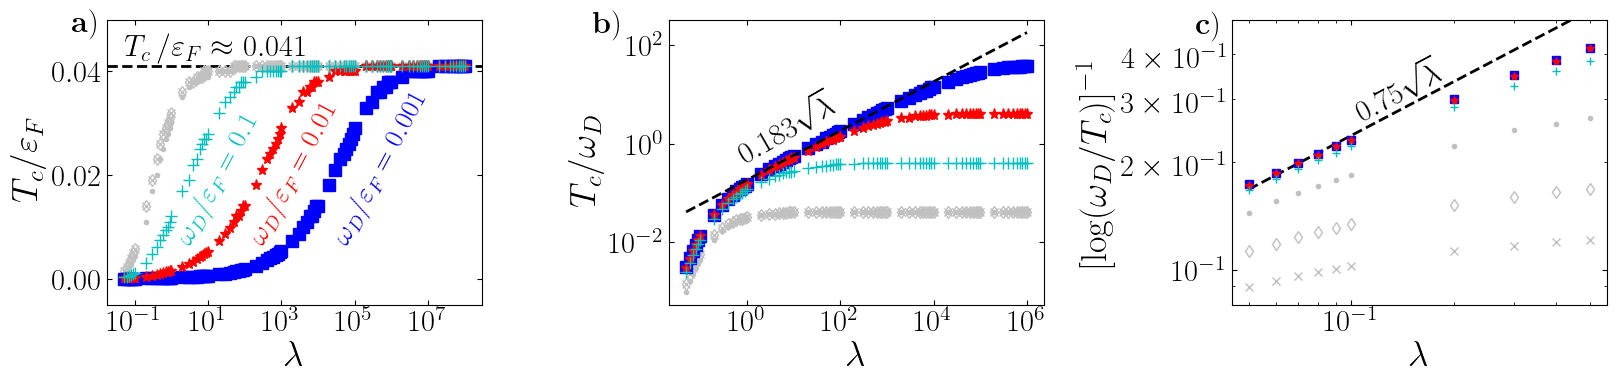

In [20]:
plt.rcParams.update(fparams)
fig = plt.figure(figsize=(15, 9.5))
specs = gridspec.GridSpec(ncols=3, nrows=1, bottom=0., top=0.3, left = 0., right = 1)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[0, 2])

ax1.axhline(y = 0.041, linestyle = '--', color ='k', linewidth = 2.)
ax1.text(5e-2, 0.043, r'$T_c\,/\varepsilon_F \approx 0.041$', color='k')
for na in range(len(a_array[3:])):
    ax1.plot(g_array , np.array(T_c_dict[3+na][0]), marker_list[3+na], color = color_list[3+na], 
            mfc = mfc_list[3+na],
            label =r'$\omega_D/\varepsilon_F={}$'.format(a_array[3+na])) 
for na in range(len(a_array[:-3])):
    ax1.plot(g_array , np.array(T_c_dict[na][0]), marker_list[na], markersize = 8,
            color = color_list[na], mfc = mfc_list[na],
            label =r'$\omega_D/\varepsilon_F={}$'.format(a_array[na])) 
ax1.text(1, 0.007, r'$\omega_D/\varepsilon_F = 0.1$', color='c', rotation=62, size = 20)
ax1.text(100, 0.007, r'$\omega_D/\varepsilon_F = 0.01$', color='r', rotation=62, size = 20)
ax1.text(20000, 0.007, r'$\omega_D/\varepsilon_F = 0.001$', color='b', rotation=62, size = 20)
ax1.tick_params(which='major', direction="in", top = "True", right = "True")
ax1.tick_params(which='minor', direction="in", top = "True", right = "True")
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylabel(r'$T_c/\varepsilon_F$')
ax1.set_xscale('log')
ax1.set_xticks([10 ** i for i in range(-1,9,2)])
ax1.set_ylim([-0.005, 0.05])
ax1.text(0.002, 0.0475, r'${\bf a)}$')

ax2.text(5e-1, 4e-1, r'$0.183 \sqrt{\lambda}$', color='k', rotation=30)
c = 0.183
for na in range(len(a_array[3:])):
    ax2.plot(g_array[:-18] , np.array(T_c_dict[3+na][0][:-18]), marker_list[3+na], color = color_list[3+na], 
            mfc = mfc_list[3+na],
            label =r'$\omega_D/\varepsilon_F={}$'.format(a_array[3+na])) 
for na in range(len(a_array[:-3])):
    ax2.plot(g_array[:-18], np.array(T_c_dict[na][0])[:-18] / a_array[na], marker_list[na], markersize = 8,  
            color = color_list[na], 
            mfc = mfc_list[na], linewidth = 2.,
            label =r'$\omega_D/\varepsilon_F={}$'.format(a_array[na]))     
ax2.plot(g_array[:-18], c * np.sqrt(g_array)[:-18], linestyle = '--', color ='k', linewidth = 2.)
ax2.tick_params(which='major', direction="in", top = "True", right = "True")
ax2.tick_params(which='minor', direction="in", top = "True", right = "True")
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$T_c/\omega_D$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xticks([10 ** i for i in range(0,8,2)])
ax2.text(0.0005, 175, r'${\bf b)}$')

ax3.text(1e-1, 2.6e-1, r'$0.75 \sqrt{\lambda}$', color='k', rotation=28)
ax3.plot(g_array[:10], 0.75 * g_array[:10] ** 0.5, '--', color = 'k', linewidth = 2.)
for na in range(len(a_array)):
    flog_large_wD = 1. / np.log(a_array[na] / (np.array(T_c_dict[na][0])[:10]))
    ax3.plot(g_array[:10] , flog_large_wD, marker_list[na], color = color_list[na], 
            mfc = mfc_list[na],
            label =r'$\omega_D/\varepsilon_F={}$'.format(a_array[na])) 
ax3.tick_params(which='major', direction="in", top = "True", right = "True")
ax3.tick_params(which='minor', direction="in", top = "True", right = "True")
ax3.set_xlabel(r'$\lambda$')
ax3.set_ylabel(r'$[\log(\omega_D/T_c)]^{-1}$')
ax3.set_xscale('log')
ax3.set_yscale('log')

ax3.set_ylim([0.08, 0.5])
ax3.text(0.035, 0.455, r'${\bf c)}$')

specs.update(wspace=0.5)

#plt.savefig('figs/fig_1.svg', bbox_inches="tight", pad_inches = 0)

plt.subplots_adjust()

In [23]:
a_array = [10 ** i for i in range(-3,0)]
print(a_array)

[0.001, 0.01, 0.1]


In [26]:
N2_array = np.concatenate((np.array([10]), np.arange(50, 350, 50)) )#np.arange(2250, 2750, 250) #np.arange(1600, 2200, 200) #np.concatenate((np.arange(2,11,1), np.arange(50, 350, 50), np.arange(500, 1600, 200)))
print(N2_array)
g_test_array = np.array([1.])
g_test = g_test_array[0]

[ 10  50 100 150 200 250 300]


In [27]:
T_conv_dict = {}
for na in range(len(a_array)):
    T_conv_list = []
    for n2 in range(len(N2_array)):
        T_conv_list.append(list(np.load('data/conv/T_c_N={}_a={}_g={}.npy'.format(N2_array[n2], a_array[na], g_test), allow_pickle = True)))
        T_conv_dict[na] = T_conv_list

In [28]:
color_list = ['b', 'r', 'c', 'silver', 'silver', 'silver']
mfc_list = ['b', 'r', 'c', 'silver', 'none', 'none']
marker_list = ['s', '*', '+', '.', 'd', 'x']
line_styles = ['-', '--', ':', '-', '--', ':']

In [29]:
T_conv_dict[0]

[[np.float64(0.00015000000000000001)],
 [np.float64(0.00015000000000000001)],
 [np.float64(0.00015000000000000001)],
 [np.float64(0.00015000000000000001)],
 [np.float64(0.00015000000000000001)],
 [np.float64(0.00015000000000000001)],
 [np.float64(0.00015000000000000001)]]

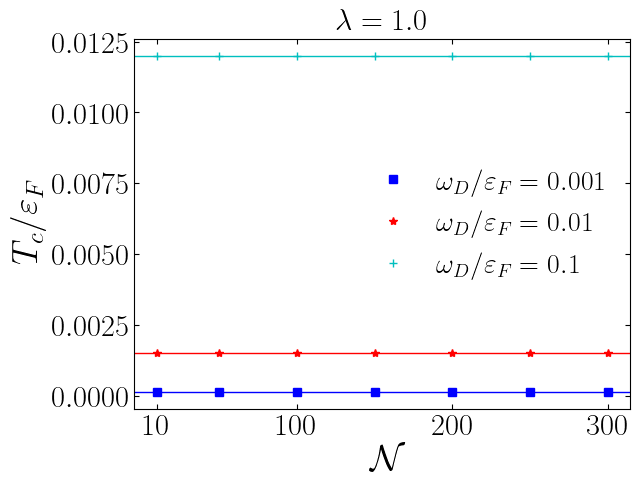

In [30]:
plt.rcParams.update(fparams)
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title(r'$\lambda = {}$'.format(g_test))

for na in range(len(a_array)):
    ax.plot(N2_array , np.array(T_conv_dict[na]), marker_list[na], color = color_list[na], 
            mfc = mfc_list[na],
            label =r'$\omega_D/\varepsilon_F={}$'.format(a_array[na])) 
for na in range(len(a_array)):
    ax.axhline(y=np.array(T_conv_dict[na])[-1], linewidth=1, color = color_list[na])     
    
ax.tick_params(which='major', direction="in", top = "True", right = "True")
ax.tick_params(which='minor', direction="in", top = "True", right = "True")
ax.set_xlabel(r'${\cal N}$')
ax.set_ylabel(r'$T_c/\varepsilon_F$')
#ax.legend(bbox_to_anchor=(1.05, 1), handlelength = 1.5, ncol = 1)
ax.legend(loc=5, handlelength = 1.5, ncol = 1)
ax.set_xticks(np.array([10, 100, 200, 300]))

plt.show()